### Question 2

The temperature T(x) that arises due to steady-state heat conduction in a bar 30 cm long is governed by the following ODE, if uniform temperature is assumed across any cross section:

$$\frac{\partial^2T}{\partial x^2} - GT=0$$

where T is the temperature difference from the ambient medium, which is at 20°C, x is the axial coordinate distance, and G is a constant that depends on the surface heat transfer rate. This equation may be replaced by a finite difference approximation, using the second order central difference scheme, as

$$(T_{i+1} - 2T_{i} + T_{i-1})/\Delta x^2 = GT_i$$

where x = $i\Delta x$. Considering 30 subdivisions of the length of the rod, with $\Delta x = 1 cm$ find the temperature differences $T_i$, where i = 1, 2, . . ., 29.

The temperatures differences $T_0$ and $T_{30}$, at x = 0 and x = 30 cm, respectively, are given as 100°C, and the constant G as $(0.071)^2 cm^{−2}$.

Write a code and solve using Thomas Algorithm. Present your results both in tabular form and in graphical form (T(x) vs x). Compare the numerical results T(x) vs x with analytical results (Validation). Comment on the validity of the developed code.

In [3]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import timeit

In [4]:
nx=31          #number of points
dx=30/(nx-1)   #division of points
T=20           #ambient temperature
G=(0.071)**2   #constant

xarr=np.linspace(0,30,nx) #creating the x array from 0 to 30
print(xarr)

T_comp=np.zeros(nx) #creating an array for the numerical solution
T_comp[0]=100       #giving initial conditions
T_comp[-1]=100

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


### The Analytical Solution

$$\frac{\partial^2T}{\partial x^2} - GT=0$$

Comparing it with the equation:
$a\frac{\partial^2y}{\partial x^2} + b\frac{\partial y}{\partial x} + cy = 0$

Here, $a=1$, $b=0$ and $c=-G=-0.005041$.

Solving the quadratic equation:
$$ar^2+br+c=0$$ 

i.e.

$$r^2-0.005041=0$$

we get $r=0.071$ and $r=-0.071$.

The solution becomes $T=c_1 e^{0.071x} + c_2 e^{-0.071x}$.

Given initial conditions are $y(0)=100$ and $y(30)=100$.

Substituting the initial conditions in the solution, we get $c_1=10.6215$ and $c_2=89.3785$.

Therefore, the solution is 

$$T = 10.6215e^{0.071x} + 89.3785e^{-0.071x}$$

In [5]:
#Analytical solution

T_analytical = np.asarray([10.6215*math.exp(0.071*x)+89.3785*math.exp(-0.071*x) for x in xarr])
print(T_analytical)        #array of analytical solutions from x=0 to x=30

[100.          94.65570972  89.78877935  85.37466438  81.39110393
  77.81800841  74.6373583   71.83311319  69.39113094  67.29909636
  65.54645906  64.12438028  63.02568833  62.24484235  61.77790446
  61.62251984  61.77790485  62.24484312  63.02568949  64.12438184
  65.54646102  67.29909873  69.39113374  71.83311642  74.63736199
  77.81801258  81.39110859  85.37466956  89.78878507  94.65571602
 100.00000691]


### Numerical Solution using TDMA:
    
Discretizing the equation as Central Difference in space, we get:

$$(T_{i+1} - 2T_{i} + T_{i-1})/\Delta x^2 = GT_i$$

where $\Delta x = 1$ and $G=0.071^2$. This gives:

$$T_{i+1} - (2+G)T_{i} + T_{i-1}=0$$

Comparing this equation with the following equation:

$$aT_{i+1} + bT_{i} + cT_{i-1}=d$$

$a=1, b=-(2+G), c=1, d=0$ for the interior nodes. For the exterior nodes, $d=100$.

Let A be the lower diagonal matrix, B is the main diagonal matrix, C is the upper diagonal matrix and D is the right hand side of the system. $a_0=0$ and $c_30=0$ i.e. $A[0]=0$ and $C[30]=0$.

Applying the boundary conditions, $T_0 = 100$, so $c_0=0$ and $b_0=1$ and $T_{30}=100$, so $a_{30}=0$ and $b_{30}=1$.

In [6]:
#Implicit numerical solution using TDMA

#Lower Diagonal matrix
a=[1]*29+[0]

#Middle Diagonal matrix
b=[1]+[-2-G]*29+[1]

#Upper Diagonal Matrix
c=[0]+[1]*29

#Right hand side of the system
d=[100]+[0]*29+[100]
    
def TDMAAlgo(a,b,c,d):
    """
    This function solves a set of equations for the temperature distribution of a 1-D array using the Thomas Algorithm.
    
    Here, a is the lower diagonal of the coefficient matrix.
    b is the main diagonal of the coefficient matrix.
    c is the upper diagonal of the coefficient matrix.
    d is the RHS column matrix.
    
    This function solves the set of equations using TDMA, which uses a series of forward elimination and back substitutions.
    It finally returns p, the solved set of temperatures.
    """
    n = len(d)                  # Finds the total number of equations
    
    # Initializing some arrays
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)
    
    # Steps to make the main diagonal element 1
    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]
    
    # Steps to make the lower diagonal element 0 
    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    
    # Getting the final RHS matrix element
    p[n-1] = g[n-1]
    
    # Back substitution
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

T_comp=TDMAAlgo(a,b,c,d)
print(T_comp)

[100.          94.65738374  89.79193535  85.37912811  81.39671705
  77.82462684  74.64485058  71.84135901  69.40001973  67.30852595
  65.55633444  64.13461242  63.03619299  62.255539    61.78871518
  61.63336827  61.78871518  62.255539    63.03619299  64.13461242
  65.55633444  67.30852595  69.40001973  71.84135901  74.64485058
  77.82462684  81.39671705  85.37912811  89.79193535  94.65738374
 100.        ]


Let us print the output values in tabular form for better visualization.

In [7]:
df = pd.DataFrame(list(zip(T_analytical, T_comp)), index=range(0,31), columns =['Analytical Values', 'Numerical Values'])
print(df)

    Analytical Values  Numerical Values
0          100.000000        100.000000
1           94.655710         94.657384
2           89.788779         89.791935
3           85.374664         85.379128
4           81.391104         81.396717
5           77.818008         77.824627
6           74.637358         74.644851
7           71.833113         71.841359
8           69.391131         69.400020
9           67.299096         67.308526
10          65.546459         65.556334
11          64.124380         64.134612
12          63.025688         63.036193
13          62.244842         62.255539
14          61.777904         61.788715
15          61.622520         61.633368
16          61.777905         61.788715
17          62.244843         62.255539
18          63.025689         63.036193
19          64.124382         64.134612
20          65.546461         65.556334
21          67.299099         67.308526
22          69.391134         69.400020
23          71.833116         71.841359


We can see that the analytical and the numerical results that we obtain through TDMA closely agree with each other. This can be further confirmed if we plot a graph depicting the numerical and analytical results together.

[]

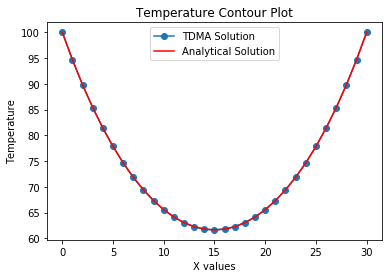

In [8]:
#Plotting the graph
plt.plot(xarr,T_comp, marker='o', label="TDMA Solution")
plt.plot(xarr, T_analytical, color='red', label='Analytical Solution')
plt.title("Temperature Contour Plot")
plt.xlabel("X values")
plt.ylabel("Temperature")
plt.legend()
plt.plot()

### Measuring the CPU time taken

Let us measure the time taken by the CPU to execute the numerical code.

The CPU time to execute the code can be done using the timeit module in Python. It requires me to put the code whose execution time needs to be computed in a string. The final result is printed below.

In [9]:
mysetup = "import numpy as np"

mycode = """

G = (0.071)**2

#Implicit numerical solution using TDMA

#Lower Diagonal matrix
a=[1]*29+[0]

#Middle Diagonal matrix
b=[1]+[-2-G]*29+[1]

#Upper Diagonal Matrix
c=[0]+[1]*29

#Right hand side of the system
d=[100]+[0]*29+[100]
    
def TDMAAlgo(a,b,c,d):
    n = len(d)                  # Finds the total number of equations
    
    # Initializing some arrays
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)
    
    # Steps to make the main diagonal element 1
    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]
    
    # Steps to make the lower diagonal element 0 
    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    
    # Getting the final RHS matrix element
    p[n-1] = g[n-1]
    
    # Back substitution
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

T_comp=TDMAAlgo(a,b,c,d)
print(T_comp)

"""

print("The time taken for the TDMA code to execute is: %f seconds"% (timeit.timeit(setup = mysetup, stmt = mycode, number = 1)))

[100.          94.65738374  89.79193535  85.37912811  81.39671705
  77.82462684  74.64485058  71.84135901  69.40001973  67.30852595
  65.55633444  64.13461242  63.03619299  62.255539    61.78871518
  61.63336827  61.78871518  62.255539    63.03619299  64.13461242
  65.55633444  67.30852595  69.40001973  71.84135901  74.64485058
  77.82462684  81.39671705  85.37912811  89.79193535  94.65738374
 100.        ]
The time taken for the TDMA code to execute is: 0.001194 seconds


### Results and Discussions

Therefore, we can see from the graph that the numerical solution obtained by TDMA closely agrees with the analytical solution. Hence, the code developed is **valid**. 

We can see that the temperature decreases until the centre of the bar, and then increases again towards the end. The temperature distribution is symmetric about the vertical axis. 

The CPU time taken for the TDMA code to execute is about 0.001194 seconds.